# Compute Basic Statistics for Each Skill
Compute basic statistics (mean, median, mode) for each skill

In [42]:
import pandas as pd
data =  pd.read_csv('clean_data.csv')
data.columns

Index(['Unnamed: 0', 'gender', 'year', 'cgpa', 'university_name',
       'Critical Thinking', 'Problem Solving', 'Team Work',
       'Communication Skill', 'Software Engineering Principal',
       'Data Structure & Algorithm', 'Database Management',
       'Data Analysis skill', 'Web Developing Skill',
       'Understanding of computer architecture & System',
       'Understanding Operating System', 'Networking Concept',
       'Cyber Security Skill', 'Machine Learning Skill', 'Robotics Skill',
       'Research Skill', 'publication', 'project', 'Influencing Factor',
       'Prefer Job'],
      dtype='object')

In [43]:
import pandas as pd
skills_df = pd.read_csv('Skills_list.csv')
skills = skills_df.iloc[:, 0].tolist()
skills

['cgpa',
 'Critical Thinking',
 'Problem Solving',
 'Team Work',
 'Communication Skill',
 'Software Engineering Principal',
 'Data Structure & Algorithm',
 'Database Management',
 'Data Analysis skill',
 'Web Developing Skill',
 'Understanding of computer architecture & System',
 'Understanding Operating System',
 'Networking Concept',
 'Cyber Security Skill',
 'Machine Learning Skill',
 'Robotics Skill',
 'Research Skill',
 'publication',
 'project']

In [44]:
statistics = {}
for skill in skills:
    if skill in data.columns:
        statistics[skill] = {
            'mean': data[skill].mean(),
            'median': data[skill].median(),
            'mode': data[skill].mode()[0] if not data[skill].mode().empty else 'No mode'  # handle empty mode
        }
    else:
        print(f"Column '{skill}' not found in the DataFrame")


data = {
    'Skill Name': [],
    'Mean': [],
    'Median': [],
    'Mode': []
}
Stat = pd.DataFrame(data)

        
        
for skill, val in statistics.items():
    Mean=val['mean']
    Median=val['median']
    Mode=val['mode']
    new_row = {'Skill Name': skill, 'Mean':Mean, 'Median': Median, 'Mode': Mode}
    
    Stat = pd.concat([Stat,pd.DataFrame([new_row])], ignore_index=True)
    #print(f"{skill}: Mean = {Mean}, Median = {Median}, Mode = {Mode}")

    
Stat

,Skill Name,Mean,Median,Mode
0,cgpa,3.316554,3.34,3.0
1,Critical Thinking,1.887059,2.00,2.0
2,Problem Solving,1.924706,2.00,2.0
3,Team Work,2.150588,2.00,2.0
4,Communication Skill,1.983529,2.00,2.0
5,Software Engineering Principal,1.623529,2.00,2.0
6,Data Structure & Algorithm,1.901176,2.00,2.0
7,Database Management,1.816471,2.00,2.0
8,Data Analysis skill,1.592941,1.00,1.0
9,Web Developing Skill,1.621176,1.00,1.0


# Identify the Distribution of Preferred Jobs Among Students

In [45]:
import pandas as pd
csv1 = pd.read_csv("clean_data.csv", usecols=["Prefer Job"])
data = pd.DataFrame(csv1)


# Split the job preferences by commas and create a flat list of jobs
all_jobs = data["Prefer Job"].str.split(",").explode().str.strip()

# Get the unique jobs by removing duplicates
jobs = all_jobs[all_jobs != ""].unique().tolist()


def is_job_preferred(preferred_jobs, job):
    return job in preferred_jobs


for job in jobs:
    data[job] = data['Prefer Job'].apply(lambda x: is_job_preferred(x, job))


for job in jobs:
    print(f"Students preferring '{job}':")
    print(data[data[job] == True].index.tolist())
    print("\n")
    
    


Students preferring 'Software Development':
[0, 2, 3, 4, 5, 6, 7, 11, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 32, 34, 35, 37, 38, 39, 43, 44, 47, 48, 49, 50, 53, 54, 55, 56, 58, 60, 63, 64, 66, 67, 70, 71, 73, 77, 78, 79, 80, 81, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 98, 101, 105, 106, 107, 110, 111, 113, 114, 115, 116, 117, 120, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 142, 145, 146, 148, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 163, 165, 168, 169, 170, 171, 172, 173, 175, 176, 177, 180, 182, 183, 185, 186, 187, 191, 192, 193, 194, 196, 197, 198, 199, 202, 203, 204, 205, 207, 209, 212, 213, 215, 216, 219, 220, 222, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 247, 250, 252, 253, 257, 259, 260, 262, 263, 264, 267, 268, 270, 273, 283, 286, 287, 288, 290, 291, 292, 293, 298, 303, 306, 315, 322, 328, 333, 336, 342, 344, 353, 355, 359, 360, 361, 363, 365, 369, 370, 376, 377, 379, 386, 387, 388, 

In [46]:
job_counts = {job: data[job].sum() for job in jobs}


job_counts_df = pd.DataFrame(list(job_counts.items()), columns=['Job', 'Count'])
job_counts_df

,Job,Count
0,Software Development,213
1,Teaching,60
2,Data Analysis,74
3,Database Administration,45
4,Business,33
5,BCS,51
6,Bank Job,49
7,Other,28
8,ML/AI Engineer,77
9,Govt Job,68


# Plot Jobs Count

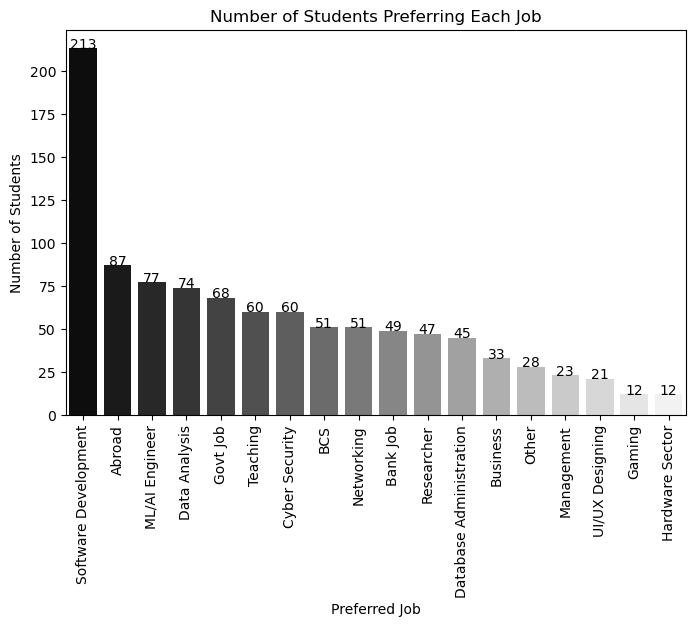

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

job_counts_df = job_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)



plt.figure(figsize=(8, 5))

ax=sns.barplot(x='Job', y='Count', data=job_counts_df, palette='gray')

#for print number on each column
for index, row in job_counts_df.iterrows():
    ax.text(index, row['Count'], row['Count'], color='black', ha="center")

plt.xticks(rotation=90)
plt.xlabel('Preferred Job')
plt.ylabel('Number of Students')
plt.title('Number of Students Preferring Each Job')
plt.show()


# prefer Job analysis with (Association Rules)

In [48]:
from mlxtend.frequent_patterns import apriori, association_rules

binary_data = data[jobs].applymap(lambda x: 1 if x else 0)

min_support = 20 / len(binary_data)

frequent_itemsets = apriori(binary_data, min_support=min_support, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules['support']=rules['support']*len(binary_data)
rules= rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(BCS),(Bank Job),36.0,0.705882,6.122449
1,(Bank Job),(BCS),36.0,0.734694,6.122449
2,(BCS),(Govt Job),41.0,0.803922,5.024510
3,(Bank Job),(Govt Job),38.0,0.775510,4.846939
4,(Networking),(Cyber Security),36.0,0.705882,5.000000
5,"(Data Analysis, Cyber Security)",(Software Development),20.0,0.952381,1.900291
6,"(ML/AI Engineer, Abroad)",(Software Development),20.0,0.769231,1.534850
7,"(BCS, Bank Job)",(Govt Job),31.0,0.861111,5.381944
8,"(BCS, Govt Job)",(Bank Job),31.0,0.756098,6.557989
9,"(Govt Job, Bank Job)",(BCS),31.0,0.815789,6.798246


# Plot Histograms of different skills

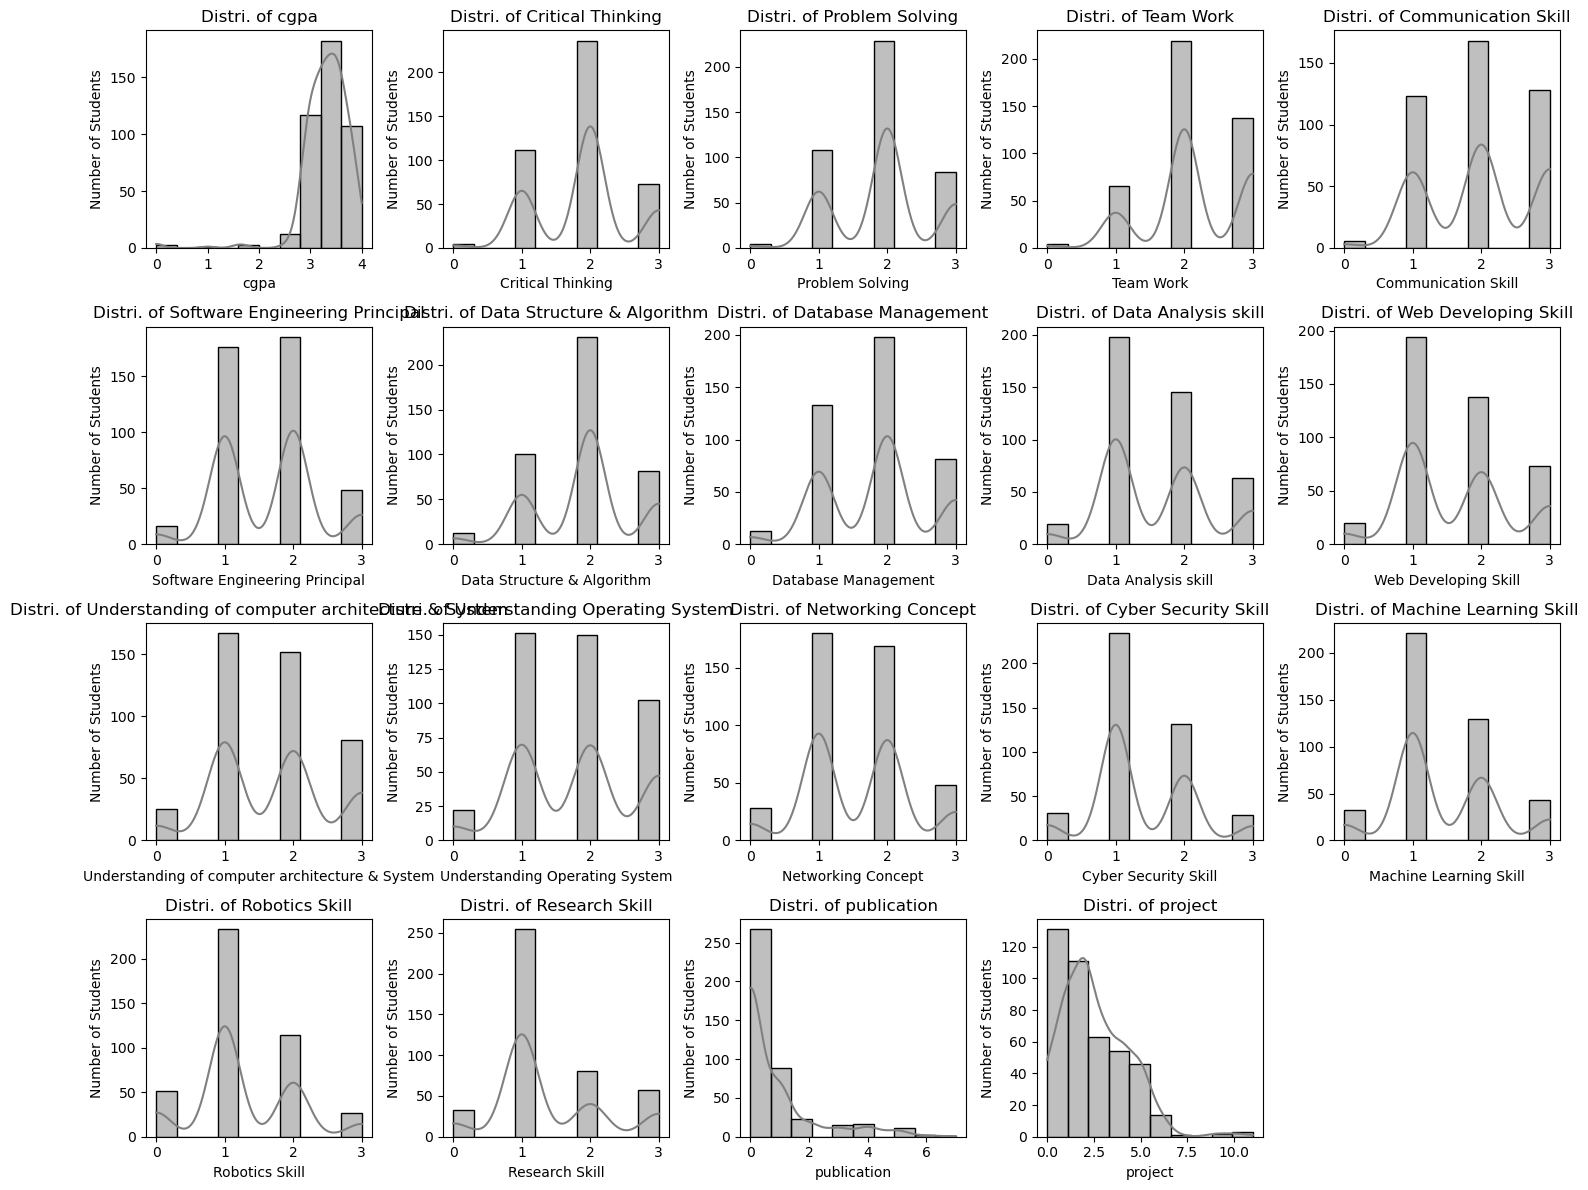

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('clean_data.csv')

# List of columns to plot
columns_to_plot = skills

# Number of columns for the subplot grid
num_cols = 5
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

# Plot each histogram in the grid
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], bins=10, kde=True, ax=axes[i], edgecolor='black',color='gray')
    axes[i].set_title(f'Distri. of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Number of Students')

# Remove any empty subplots
for j in range(i + 1, num_rows *num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



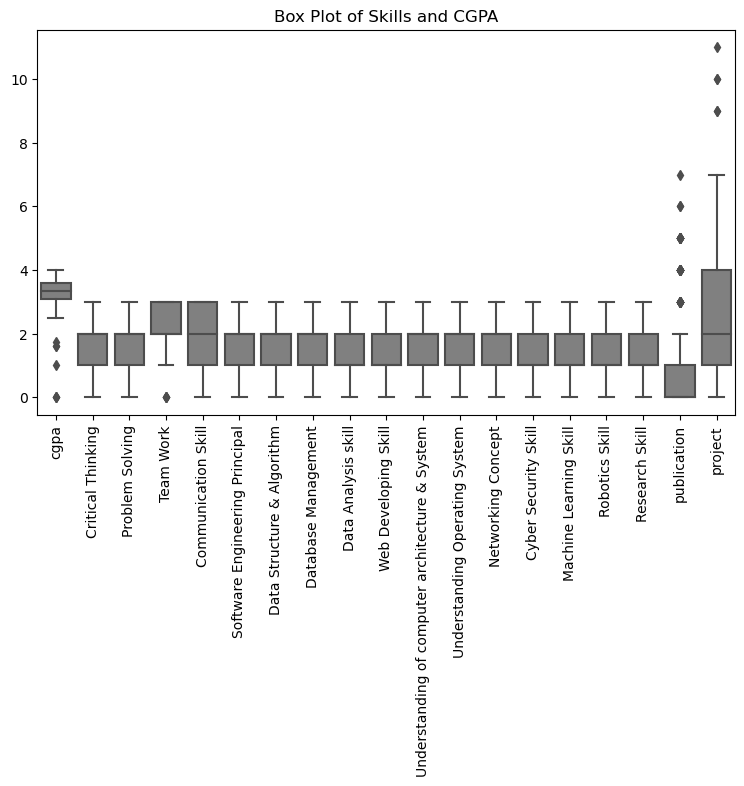

In [50]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=data[columns_to_plot],color='gray')
plt.title('Box Plot of Skills and CGPA')
plt.xticks(rotation=90)
plt.show()

# Correlation Analysis

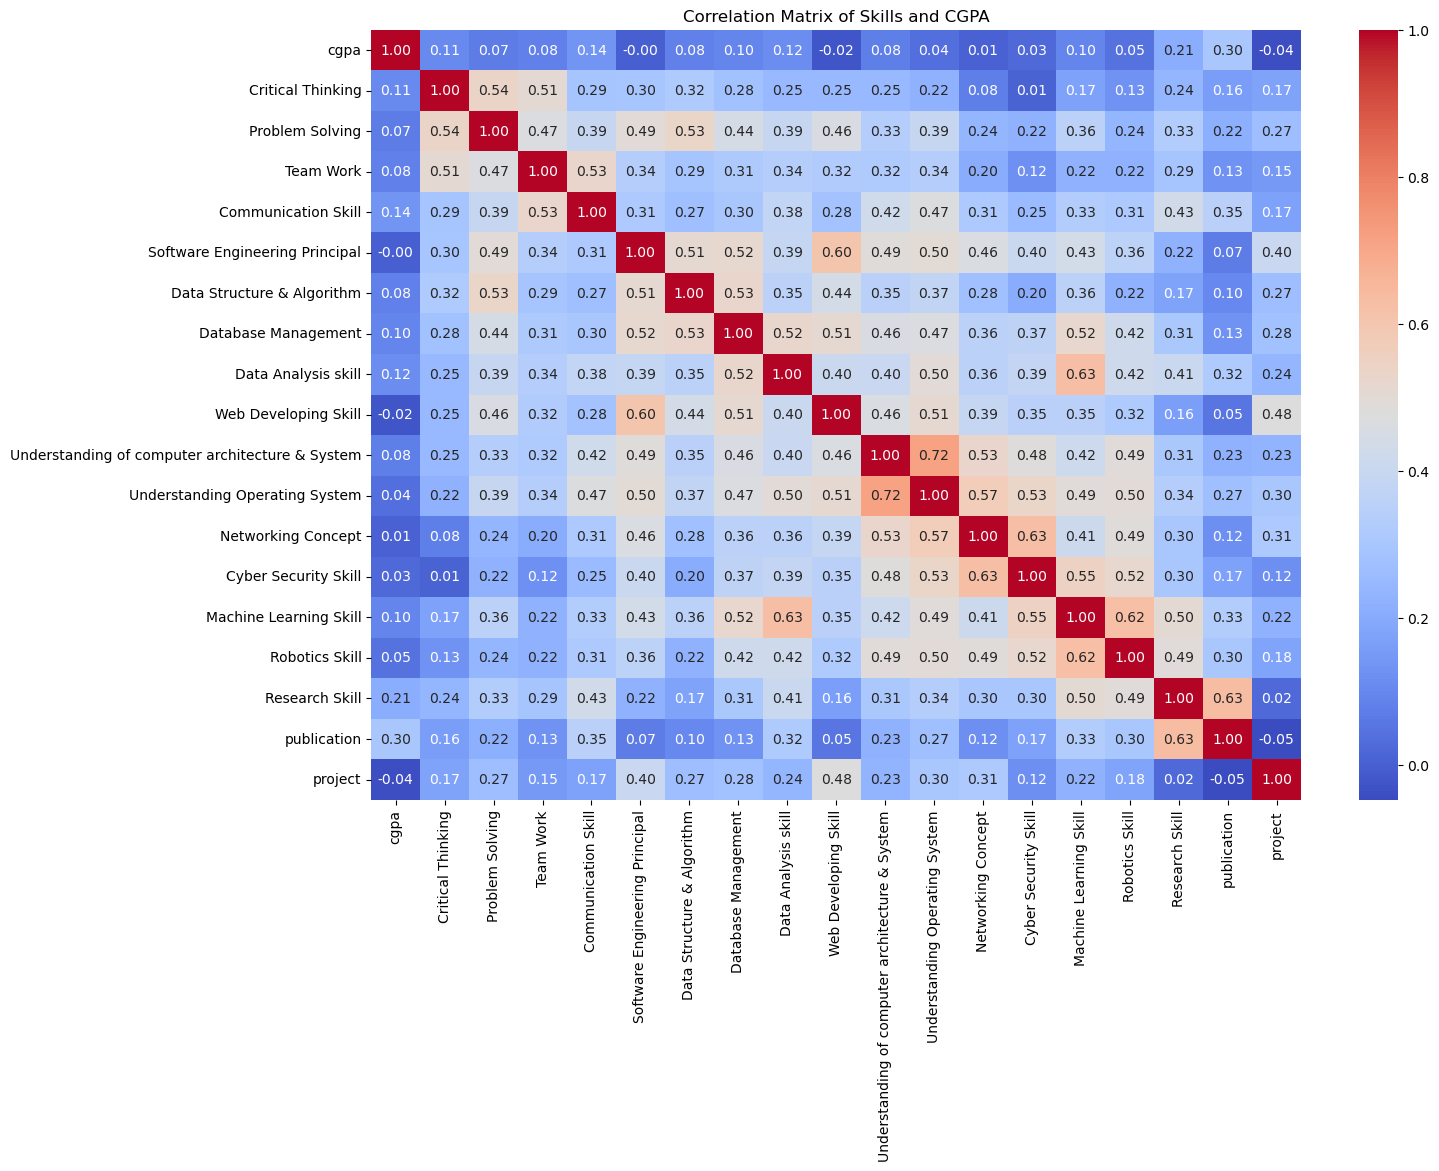

Skills most positively correlated with CGPA:
publication            0.302697
Research Skill         0.207922
Communication Skill    0.135009
Data Analysis skill    0.115082
Critical Thinking      0.106356
Name: cgpa, dtype: float64

Skills most negatively correlated with CGPA:
Cyber Security Skill              0.025280
Networking Concept                0.006245
Software Engineering Principal   -0.000848
Web Developing Skill             -0.024828
project                          -0.042510
Name: cgpa, dtype: float64


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('clean_data.csv')

correlation_matrix = data[skills].corr()

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Skills and CGPA')
plt.show()

# Identify skills most correlated with CGPA
cgpa_correlations = correlation_matrix['cgpa'].drop('cgpa').sort_values(ascending=False)
print("Skills most positively correlated with CGPA:")
print(cgpa_correlations.head())
print("\nSkills most negatively correlated with CGPA:")
print(cgpa_correlations.tail())


In [52]:
# Display the correlation matrix DataFrame
correlation_matrix


,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,Data Analysis skill,Web Developing Skill,Understanding of computer architecture & System,Understanding Operating System,Networking Concept,Cyber Security Skill,Machine Learning Skill,Robotics Skill,Research Skill,publication,project
cgpa,1.000000,0.106356,0.071608,0.082061,0.135009,-0.000848,0.083163,0.095766,0.115082,-0.024828,0.078394,0.037589,0.006245,0.025280,0.096080,0.046953,0.207922,0.302697,-0.042510
Critical Thinking,0.106356,1.000000,0.536420,0.507484,0.291946,0.295899,0.317584,0.278182,0.249744,0.250994,0.250678,0.223893,0.078672,0.008841,0.172107,0.129027,0.238640,0.160082,0.174453
Problem Solving,0.071608,0.536420,1.000000,0.467787,0.393196,0.494251,0.532934,0.444567,0.392872,0.457248,0.334777,0.393364,0.238673,0.220881,0.357725,0.237350,0.325776,0.218544,0.265572
Team Work,0.082061,0.507484,0.467787,1.000000,0.526711,0.335529,0.291913,0.313299,0.335420,0.324616,0.319521,0.336603,0.204512,0.122611,0.223523,0.220461,0.292181,0.128631,0.148577
Communication Skill,0.135009,0.291946,0.393196,0.526711,1.000000,0.309189,0.270137,0.303067,0.381051,0.282990,0.424329,0.469769,0.312010,0.254997,0.325390,0.310670,0.431153,0.353202,0.173292
Software Engineering Principal,-0.000848,0.295899,0.494251,0.335529,0.309189,1.000000,0.512282,0.516382,0.389071,0.604896,0.485298,0.499502,0.463993,0.404893,0.431775,0.358889,0.221606,0.071181,0.401037
Data Structure & Algorithm,0.083163,0.317584,0.532934,0.291913,0.270137,0.512282,1.000000,0.529709,0.354173,0.437092,0.352967,0.374607,0.275783,0.204979,0.355101,0.221108,0.174930,0.102296,0.266811
Database Management,0.095766,0.278182,0.444567,0.313299,0.303067,0.516382,0.529709,1.000000,0.522149,0.512309,0.458915,0.467935,0.355938,0.366081,0.520225,0.420319,0.307744,0.125347,0.277866
Data Analysis skill,0.115082,0.249744,0.392872,0.335420,0.381051,0.389071,0.354173,0.522149,1.000000,0.403673,0.402387,0.496443,0.357227,0.385975,0.631890,0.420853,0.405898,0.319869,0.239206
Web Developing Skill,-0.024828,0.250994,0.457248,0.324616,0.282990,0.604896,0.437092,0.512309,0.403673,1.000000,0.462487,0.511069,0.390291,0.350825,0.353529,0.317506,0.163783,0.052126,0.477999


# Skill Clustering

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('clean_data.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[skills])
data_scaled

array([[ 1.14500512,  0.16522673,  0.10825648, ...,  0.76205958,
         0.18366054, -0.3052002 ],
       [-1.78616161, -1.29771827, -1.32952489, ..., -0.46940552,
        -0.57416207, -1.4138334 ],
       [ 0.05128619,  0.16522673,  0.10825648, ..., -0.46940552,
        -0.57416207, -0.3052002 ],
       ...,
       [ 0.16065809,  0.16522673,  0.10825648, ..., -0.46940552,
         0.18366054, -0.3052002 ],
       [ 0.29190436, -1.29771827,  0.10825648, ...,  0.76205958,
         0.18366054,  0.2491164 ],
       [ 1.07938199, -1.29771827,  0.10825648, ...,  1.99352469,
         2.45712837,  0.2491164 ]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

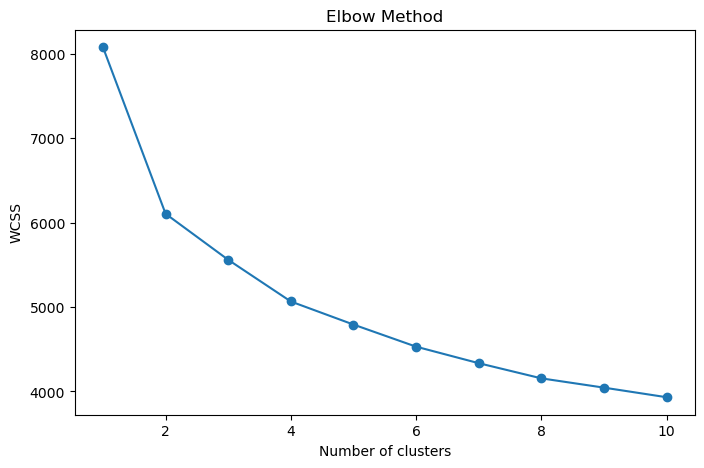

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [34]:
# Fit the K-means algorithm with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [35]:
# Calculate the mean skill ratings for each cluster
cluster_profiles = data.groupby('Cluster')[skills].mean()

print("Cluster Profiles:")
cluster_profiles


Cluster Profiles:


,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,Data Analysis skill,Web Developing Skill,Understanding of computer architecture & System,Understanding Operating System,Networking Concept,Cyber Security Skill,Machine Learning Skill,Robotics Skill,Research Skill,publication,project
Cluster,,,,,,,,,,,,,,,,,,,
0,3.210197,1.400000,1.260000,1.650000,1.380000,0.970000,1.300000,1.080000,0.920000,0.950000,0.960000,0.910000,0.820000,0.860000,0.790000,0.730000,0.730000,0.130000,1.440000
1,3.296146,1.957219,1.951872,2.144385,1.919786,1.540107,1.898396,1.775401,1.459893,1.508021,1.524064,1.631016,1.582888,1.251337,1.256684,1.085561,1.379679,0.641711,2.550802
2,3.421279,2.144928,2.369565,2.521739,2.507246,2.210145,2.340580,2.405797,2.260870,2.260870,2.413043,2.615942,2.057971,1.905797,2.130435,1.927536,1.855072,1.369565,3.355072


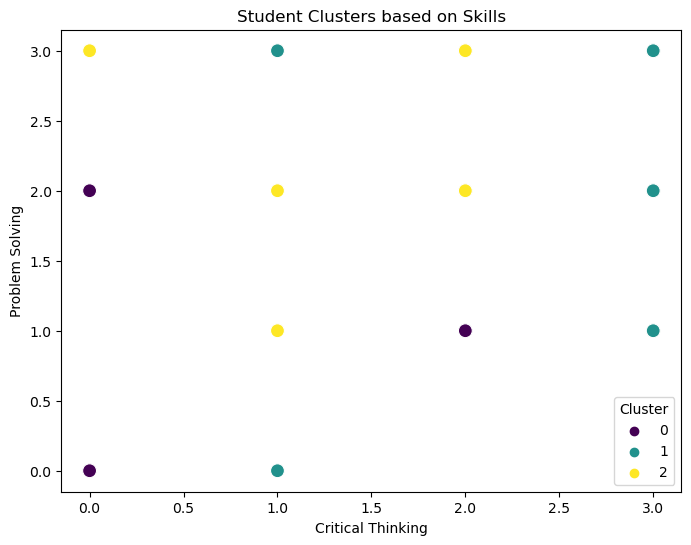

In [36]:
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Critical Thinking', y='Problem Solving', hue='Cluster', palette='viridis', s=100)
plt.title('Student Clusters based on Skills')
plt.xlabel('Critical Thinking')
plt.ylabel('Problem Solving')
plt.show()


# Influencing Factors Analysis


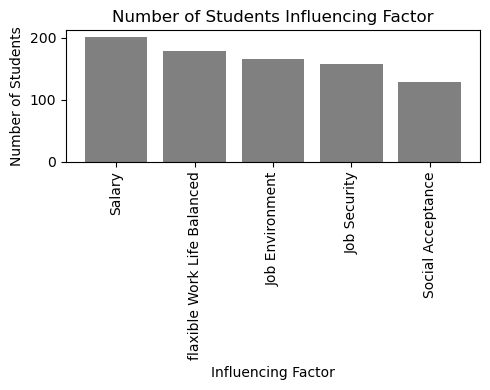

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

csv1 = pd.read_csv("clean_data.csv", usecols=["Influencing Factor"])
data = pd.DataFrame(csv1)
data["Influencing Factor"].fillna("", inplace=True)
jobs = ['Social Acceptance', 'Job Security', 'Job Environment', 'Salary', 'flaxible Work Life Balanced']


def is_job_preferred(preferred_jobs, job):
    return job in preferred_jobs


for job in jobs:
    data[job] = data['Influencing Factor'].apply(lambda x: is_job_preferred(x, job))


job_sum = {}
for job in jobs:
    job_sum[job] = data[job].sum()

job_counts = pd.DataFrame(list(job_sum.items()), columns=['Job', 'Count'])


job_counts = job_counts.sort_values(by='Count', ascending=False)

#print(job_counts)



# Plotting the bar plot
plt.figure(figsize=(5, 4))
plt.bar(job_counts['Job'], job_counts['Count'], color='gray')
plt.xlabel('Influencing Factor')
plt.ylabel('Number of Students')
plt.title('Number of Students Influencing Factor')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Influencing Factors based on- prefered job

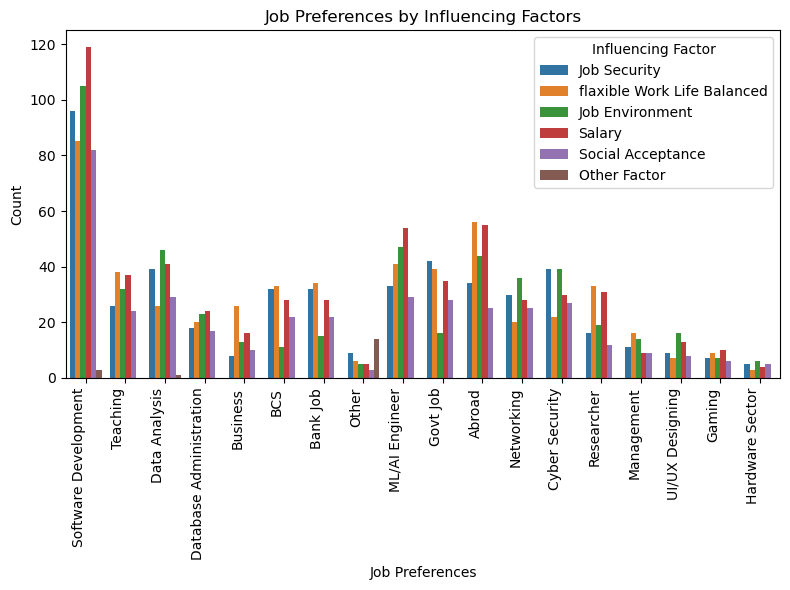

In [38]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'clean_data.csv'  # Change this to your file path

# Read the relevant columns and split the comma-separated values into lists
data = pd.read_csv(file_path, usecols=["Influencing Factor", "Prefer Job"])
data['Influencing Factor'] = data['Influencing Factor'].astype(str).str.split(',')
data['Prefer Job'] = data['Prefer Job'].astype(str).str.split(',')

# Flatten the data to have one row per (influencing factor, job preference)
rows = []
for index, row in data.iterrows():
    for factor in row['Influencing Factor']:
        for job in row['Prefer Job']:
            rows.append((factor.strip(), job.strip()))

# Create a new DataFrame from the flattened data
flat_data = pd.DataFrame(rows, columns=["Influencing Factor", "Prefer Job"])

# Plot the data
plt.figure(figsize=(8, 6))
sns.countplot(data=flat_data, x='Prefer Job', hue='Influencing Factor')
plt.title('Job Preferences by Influencing Factors')
plt.xlabel('Job Preferences')
plt.ylabel('Count')
plt.legend(title='Influencing Factor')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
from collections import Counter

# Define the function to get job preferences based on influencing factor indices
def fun(indices, factor, data1):
    v = []
    for index in indices:
        v.extend(data1.at[index, 'Prefer Job'])
    counts = Counter(v)
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_counts, columns=['Preferred Job', factor])

# Read the CSV file and select the necessary columns
data = pd.read_csv("rrr_data.csv", usecols=["Influencing Factor", "Prefer Job"])
data['Influencing Factor'] = data['Influencing Factor'].astype(str).str.split(',')
data['Prefer Job'] = data['Prefer Job'].astype(str).str.split(',')

# Initialize dictionary to store indices for different factors
indices = {
    'Salary': [],
    'Job Environment': [],
    'flaxible Work Life Balanced': [],
    'Job Security': [],
    'Social Acceptance': [],
    'other': []
}

# Populate the lists based on the influencing factors
for index, row in data.iterrows():
    for factor in row['Influencing Factor']:
        factor = factor.strip()
        if factor in indices:
            indices[factor].append(index)

# Create DataFrames for each influencing factor and merge them
merged_df = pd.DataFrame({'Preferred Job': []})
for factor, idx_list in indices.items():
    df = fun(idx_list, factor, data)
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='Preferred Job', how='outer')

# Fill NaN values with 0 (if needed)
merged_df = merged_df.fillna(0)
merged_df['other'] = merged_df['other'].astype('int16')
# Display the merged DataFrame
merged_df


,Preferred Job,Salary,Job Environment,flaxible Work Life Balanced,Job Security,Social Acceptance,other
0,Software Development,84,75,76,89,66,15
1,Abroad,40,37,34,33,22,0
2,ML/AI Engineer,28,25,29,26,16,0
3,Data Analysis,23,28,17,35,20,1
4,Teaching,22,26,21,19,18,0
5,Govt Job,22,14,20,30,21,0
6,Cyber Security,19,27,16,33,20,0
7,Bank Job,18,15,16,20,16,0
8,Business,16,12,15,6,5,0
9,BCS,15,11,14,18,15,0


# Factor analysis

In [40]:
import pandas as pd

# Load the data
csv1 = pd.read_csv("clean_data.csv")
df = pd.DataFrame(csv1)



columns_to_drop = ['Unnamed: 0', 'gender','university_name','year']  
df = df.drop(columns_to_drop, axis=1)



scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

df

ValueError: setting an array element with a sequence.

In [ ]:
Analytical Skills:
    
Critical Thinking
Problem Solving
Data Analysis skill
Research Skill


Communication Skill:
    
Public Speaking
Professional Writing
Team Work
Leadership & Professional Attitude
Mass Communication


Technical Skill:
    
cgpa
Software Engineering Principal
Data Structure & Algorithm
Database Management
Web Developing Skill
Machine Learning Skill
Robotics Skill
Cyber Security Skill
publication
project


Systems Knowledge:
    
Understanding of computer architecture & System
Understanding Operating System
Networking Concept

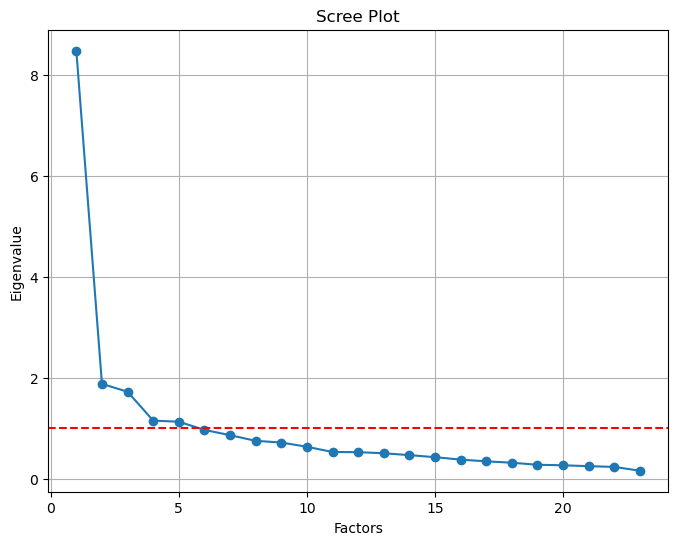

Factor Loadings:
                                                  Factor 1  Factor 2  Factor 3  \
Unnamed: 0                                      -0.054379  0.055448  0.102209   
cgpa                                            -0.136777  0.008713  0.115518   
Critical Thinking                                0.025289  0.378567  0.575463   
Problem Solving                                  0.174746  0.212964  0.657719   
Public Speaking                                  0.119503  0.558869  0.068214   
Professional Writing                             0.258019  0.465092  0.034181   
Team Work                                        0.150520  0.676803  0.351549   
Leadership & Professional Attitude               0.170830  0.767419  0.224580   
Mass Communication                               0.196966  0.608905  0.047120   
Software Engineering Principal                   0.504253  0.172506  0.436745   
Data Structure & Algorithm                       0.268821  0.034254  0.714860   
Database M

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Unnamed: 0,-0.054379,0.055448,0.102209,0.064333,0.121578
cgpa,-0.136777,0.008713,0.115518,0.012637,0.054772
Critical Thinking,0.025289,0.378567,0.575463,0.034133,0.069041
Problem Solving,0.174746,0.212964,0.657719,0.108234,0.095276
Public Speaking,0.119503,0.558869,0.068214,0.097792,0.160478
Professional Writing,0.258019,0.465092,0.034181,0.379403,0.242350
Team Work,0.150520,0.676803,0.351549,0.096937,0.023583
Leadership & Professional Attitude,0.170830,0.767419,0.224580,0.139377,0.004898
Mass Communication,0.196966,0.608905,0.047120,0.208571,0.127399
Software Engineering Principal,0.504253,0.172506,0.436745,0.157361,0.264414


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('skills.csv')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform initial factor analysis
fa = FactorAnalyzer(n_factors=20, rotation=None)
fa.fit(scaled_data)

# Get eigenvalues
ev, v = fa.get_eigenvalues()

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

# Based on the scree plot, decide on the number of factors (e.g., 5)
n_factors = 5

# Perform EFA with Varimax rotation
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(scaled_data)

# Get factor loadings
loadings = fa.loadings_

# Create a DataFrame for the factor loadings
loadings_df = pd.DataFrame(loadings, index=data.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])
print("Factor Loadings:\n", loadings_df)

# Interpretation of factors with naming
print("\nInterpretation of Factors and Naming:")
factor_names = ["Analytical Skills", "Communication & Leadership Skills", "Technical Skills", "Systems & Research Skills", "Advanced Technical Skills"]
for i in range(n_factors):
    factor_skills = loadings_df.iloc[:, i].nlargest(5).index.tolist()
    factor_description = f"Factor {i+1} ({factor_names[i]}) is associated with: {', '.join(factor_skills)}"
    print(factor_description)

# Optional: Calculate Cronbach's alpha for each factor
def calculate_cronbach_alpha(itemscores):
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return nitems / (nitems - 1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

print("\nCronbach's Alpha for each factor:")
for i in range(n_factors):
    factor_items = data.loc[:, loadings_df.iloc[:, i].nlargest(5).index]
    alpha = calculate_cronbach_alpha(factor_items)
    print(f"Cronbach's Alpha for Factor {i+1} ({factor_names[i]}): {alpha:.2f}")

# Display the factor loadings DataFrame
loadings_df
